In [39]:
import numpy as np
from data import *
from model import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize']=(20,10)

In [3]:
data = DataObject('List of S&P 500 companies',end_date=int(time.time()))
d = data.get_data()

In [4]:
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


/home/aidris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


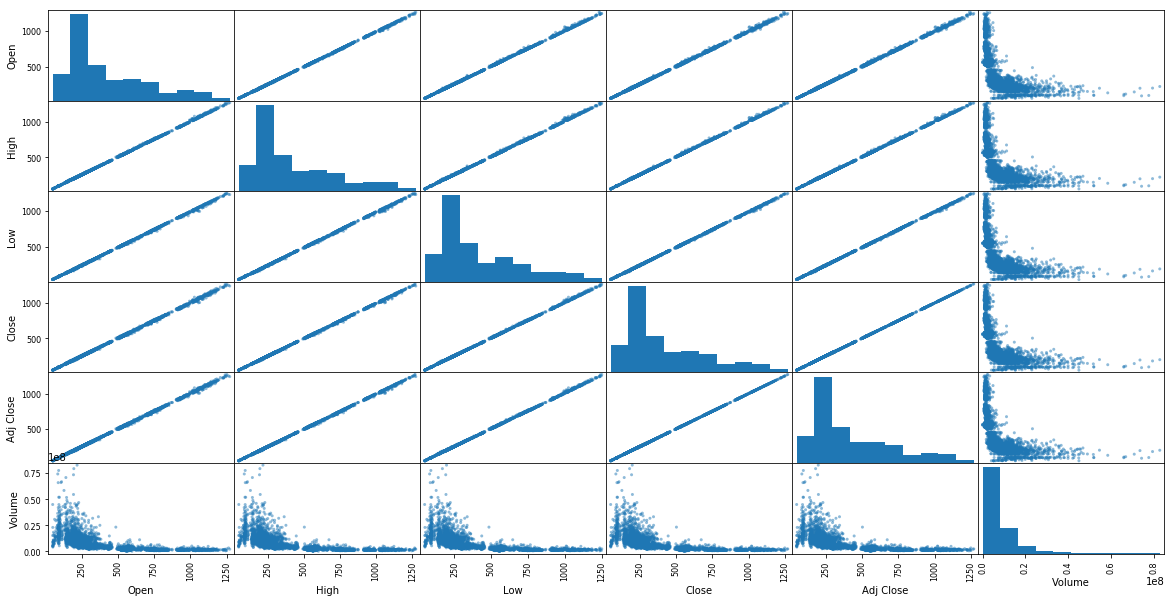

In [5]:
_=pd.scatter_matrix(d)
plt.show()

In [6]:
X,target = data.create_dataset(d)

In [7]:
(train,train_y),(val,val_y),(test,test_y) ,args =data.preprocess_data(X,target)

In [8]:
train_x,val_x,test_x = data.reshape(train,val,test)
f = lambda x : x.values
train_y,val_y,test_y = map(f,(train_y,val_y,test_y))

In [25]:
model_init = init_model()
model_init.build_model()

In [42]:
my_model = model_init.model

In [43]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 256)            267264    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 792,833
Trainable params: 792,833
Non-trainable params: 0
_________________________________________________________________


In [44]:
callback1 = my_callbacks()
model_init.save_callbacks()
callback2 = model_init.save_model
my_model.fit(train_x,train_y,epochs=10,callbacks=[callback1,callback2],validation_data=[val_x,val_y])

Train on 2800 samples, validate on 500 samples
Epoch 1/10
2800/2800 [==============================] - 3s 1ms/step - loss: 5.9713e-04 - val_loss: 0.00137e-
RMSE for  this epoch is 0.03538042879918479:
Epoch 2/10
2800/2800 [==============================] - 3s 1ms/step - loss: 5.8838e-04 - val_loss: 2.8291e-04
RMSE for  this epoch is 0.01682005125720701:
Epoch 3/10
2800/2800 [==============================] - 3s 1ms/step - loss: 5.9676e-04 - val_loss: 0.0022
RMSE for  this epoch is 0.04652603502971582:
Epoch 4/10
2800/2800 [==============================] - 3s 1ms/step - loss: 5.8662e-04 - val_loss: 0.0021
RMSE for  this epoch is 0.046318509598494505:
Epoch 5/10
2800/2800 [==============================] - 3s 1ms/step - loss: 5.8101e-04 - val_loss: 2.7451e-04
RMSE for  this epoch is 0.01656838187943213:
Epoch 6/10
2800/2800 [==============================] - 3s 1ms/step - loss: 6.2288e-04 - val_loss: 0.0014
RMSE for  this epoch is 0.03729209434632079:
Epoch 7/10
2800/2800 [=============

## LOADING THE BEST SAVED MODEL

In [29]:
model = keras.models.load_model('model.h5')

In [35]:
y_pred = model.predict(test_x)


##  SCALING BACK BY THE y_scale factor used in preprocessing stage

In [36]:
y_scale = args[-1] #preprocessing factor for target labels
y_pred*=y_scale
test_y*=y_scale


## VISUALISING  OF test and predicted values

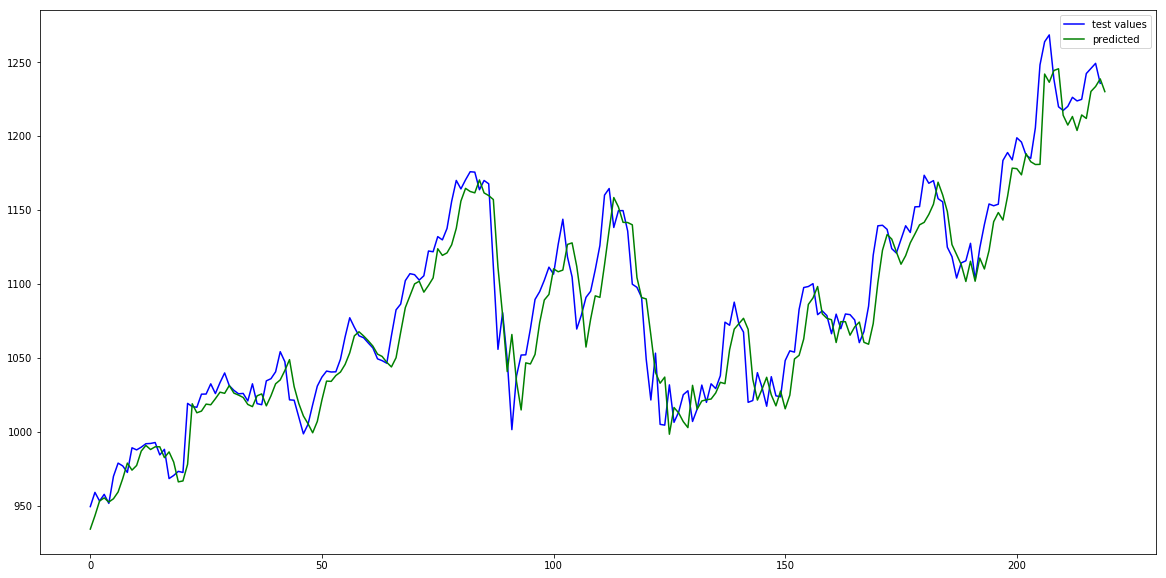

In [38]:

plt.plot(test_y,'-b',label='test values')
plt.plot(y_pred,'-g',label='predicted')
plt.legend()